In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as lm

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler


In [2]:
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape


(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_train, df_test = train_test_split(df, test_size=0.15, random_state=1)

In [6]:
df_train.shape

(257, 14)

In [7]:
df_test.shape

(46, 14)

In [8]:
#sns.pairplot(data=df, hue='output')
#plt.show


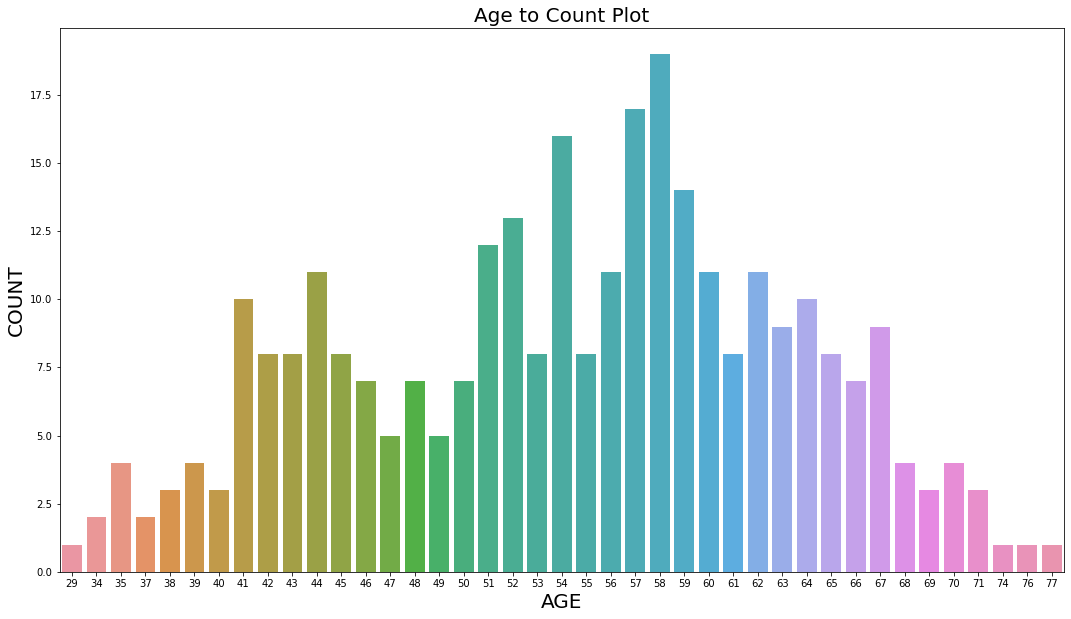

In [9]:
plt.figure(figsize=(18, 10))
sns.countplot(x=df["age"]); 
plt.title("Age to Count Plot", fontsize=20)
plt.xlabel("AGE", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show();

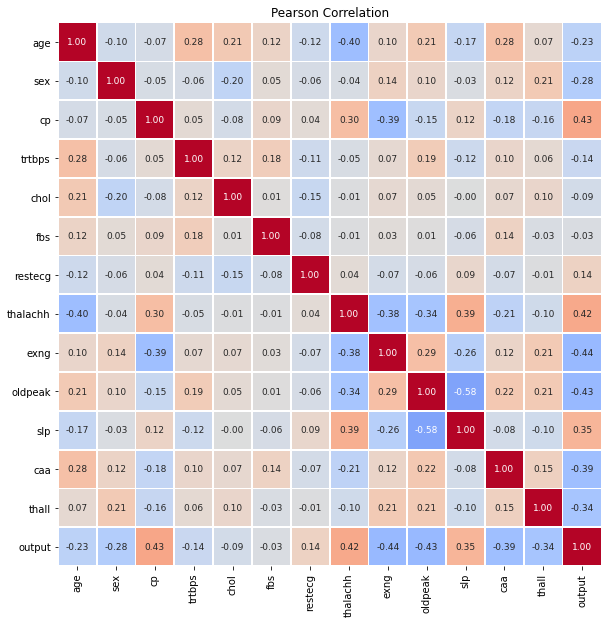

fbs         0.028046
chol        0.085239
restecg     0.137230
trtbps      0.144931
age         0.225439
sex         0.280937
thall       0.344029
slp         0.345877
caa         0.391724
thalachh    0.421741
oldpeak     0.430696
cp          0.433798
exng        0.436757
output      1.000000
Name: output, dtype: float64


In [48]:
def heatmap(df):
    
    fig, ax = plt.subplots(figsize = (10, 10))
    
    sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, fmt = ".2f", annot_kws = {"fontsize": 9},
                vmin = -1, vmax = 1, square = True, linewidths = 0.8, cbar = False)
    plt.title('Pearson Correlation')
    plt.show()
    print (df.corr()['output'].abs().sort_values())
    
heatmap(df)

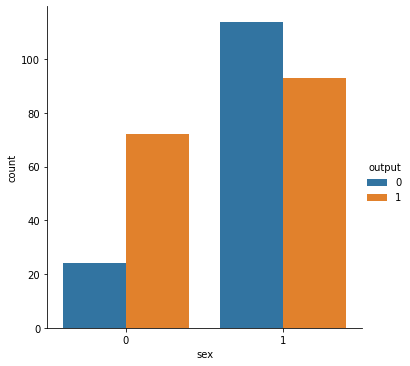

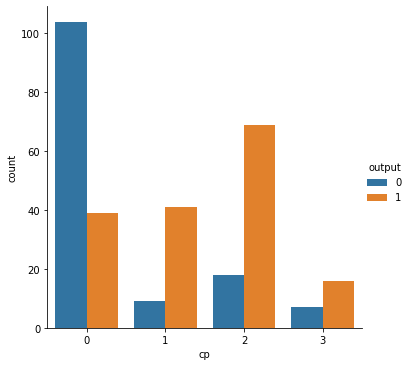

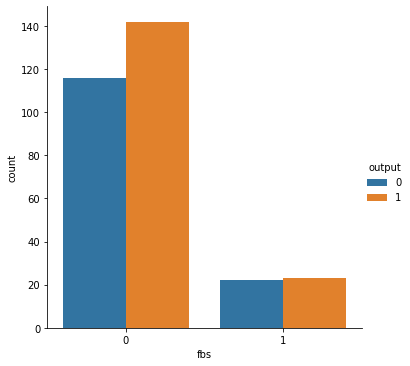

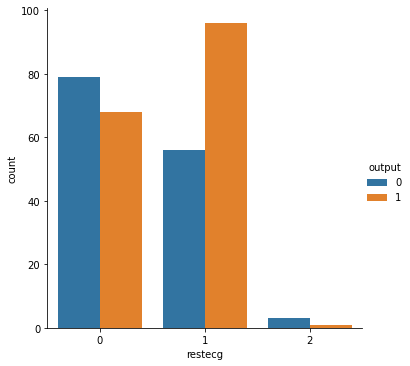

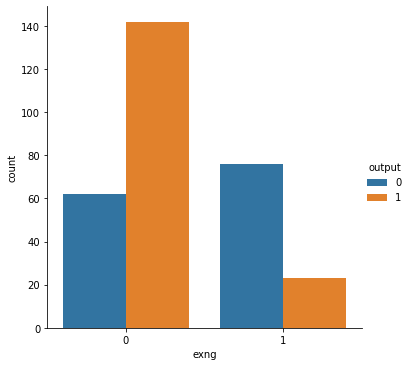

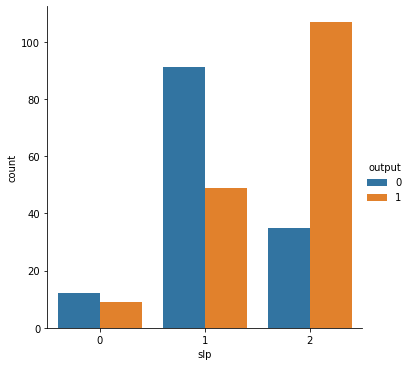

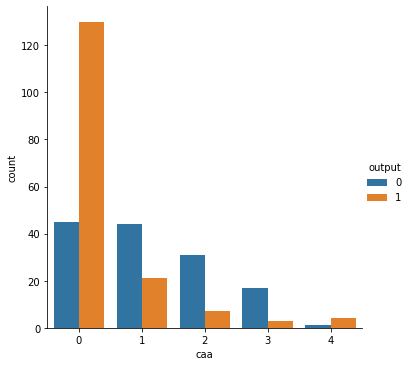

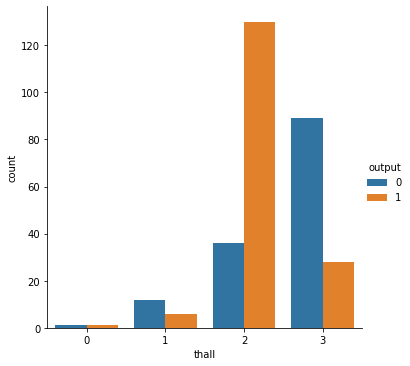

In [11]:
sns.catplot(x="sex", data=df, kind="count", hue="output")
sns.catplot(x="cp", data=df, kind="count", hue="output")
sns.catplot(x="fbs", data=df, kind="count", hue="output")
sns.catplot(x="restecg", data=df, kind="count", hue="output")
sns.catplot(x="exng", data=df, kind="count", hue="output")
sns.catplot(x="slp", data=df, kind="count", hue="output")
sns.catplot(x="caa", data=df, kind="count", hue="output")
sns.catplot(x="thall", data=df, kind="count", hue="output")

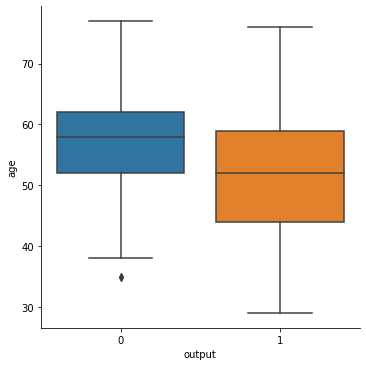

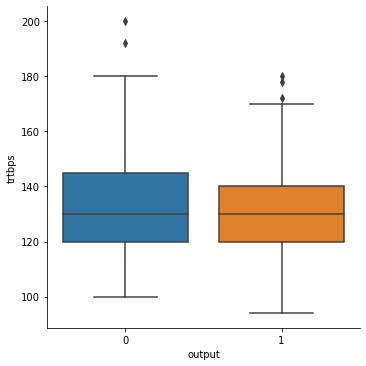

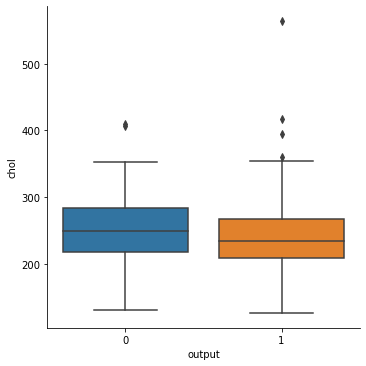

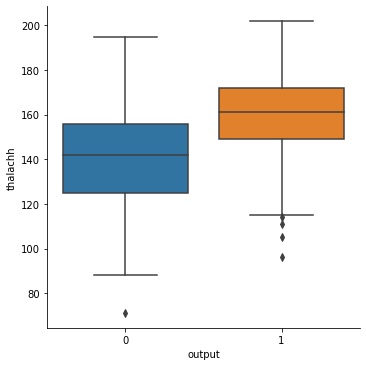

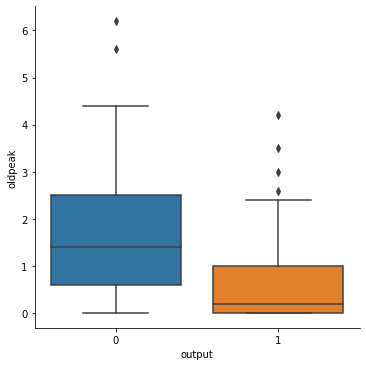

In [12]:
sns.catplot(x="output", y="age", data=df, kind="box")
sns.catplot(x="output", y="trtbps", data=df, kind="box")
sns.catplot(x="output", y="chol", data=df, kind="box")
sns.catplot(x="output", y="thalachh", data=df, kind="box")
sns.catplot(x="output", y="oldpeak", data=df, kind="box")

In [13]:
mod1=smf.logit('output ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + exng + oldpeak + slp + caa + thall', data=df_train).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.323947
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  257
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                           13
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.5289
Time:                        22:10:38   Log-Likelihood:                -83.254
converged:                       True   LL-Null:                       -176.72
Covariance Type:            nonrobust   LLR p-value:                 6.526e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0705      2.991      1.027      0.305      -2.792       8.933
age            0.0016      0.027      0.060      0.952      -0.051       0.054
sex           -2.6828      0.610     -4.401      0.000      -3.878      -1.488
cp             1.0025      0.213      4.703      0.000       0.585       1.420
trtbps        -0.0269      0.012     -2.297      0.022      -0.050      -0.004
chol          -0.0055      0.005     -1.207      0.227      -0.014       0.003
fbs            0.3855      0.609      0.633      0.527      -0.809       1.580
restecg        0.4615      0.398      1.158      0.247      -0.319       1.242
thalachh       0.0340      0.012      2.742      0.006       0.010       0.058
exng          -1.2072      0.467     -2.588      0.010      -2.122      -0.293
oldpeak       -0.7362      0.250     -2.944      0.003      -1.226      -0.246
slp            0.3633      0.408      0.890      0.374      -0.437       1.164
caa           -0.6966      0.217     -3.213      0.001      -1.122      -0.272
thall         -0.6589      0.325     -2.026      0.043      -1.296      -0.022
==============================================================================
"""

In [14]:
mod2=smf.logit('output ~ C(Q("sex")) + C(Q("cp")) + C(Q("exng")) + oldpeak + C(Q("caa")) + C(Q("thall")) + thalachh + trtbps ', data=df_train).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.292463
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  257
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.5747
Time:                        22:10:38   Log-Likelihood:                -75.163
converged:                       True   LL-Null:                       -176.72
Covariance Type:            nonrobust   LLR p-value:                 4.956e-35
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2907      3.364      0.086      0.931      -6.302       6.883
C(Q("sex"))[T.1]      -2.2578      0.622     -3.629      0.000      -3.477      -1.038
C(Q("cp"))[T.1]        1.4052      0.653      2.153      0.031       0.126       2.684
C(Q("cp"))[T.2]        2.2170      0.571      3.883      0.000       1.098       3.336
C(Q("cp"))[T.3]        2.7914      0.752      3.710      0.000       1.317       4.266
C(Q("exng"))[T.1]     -0.9751      0.493     -1.979      0.048      -1.941      -0.009
C(Q("caa"))[T.1]      -1.9291      0.532     -3.629      0.000      -2.971      -0.887
C(Q("caa"))[T.2]      -2.5788      0.780     -3.305      0.001      -4.108      -1.050
C(Q("caa"))[T.3]      -1.3169      0.934     -1.410      0.159      -3.148       0.514
C(Q("caa"))[T.4]       0.6138      1.675      0.366      0.714      -2.669       3.897
C(Q("thall"))[T.1]     1.5200      2.805      0.542      0.588      -3.978       7.018
C(Q("thall"))[T.2]     1.8874      2.679      0.704      0.481      -3.364       7.139
C(Q("thall"))[T.3]     0.5820      2.681      0.217      0.828      -4.673       5.837
oldpeak               -0.7596      0.243     -3.132      0.002      -1.235      -0.284
thalachh               0.0311      0.012      2.517      0.012       0.007       0.055
trtbps                -0.0282      0.012     -2.370      0.018      -0.052      -0.005
======================================================================================
"""

In [15]:
mod2.aic

182.32614912808134

In [16]:
mod1.aic

194.50884588826864

In [51]:
df_test['phat_test']=mod2.predict(exog=df_test)
df_test.head(10)

/Users/tuantran/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,phat_test
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0.005681
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,0.804600
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0.018933
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0.001779
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0.026155
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,0.000578
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0,0.017209
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.883963
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0,0.001173
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.994636


In [19]:
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['output'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['output'], y_score=df_test['phat_test'])

In [20]:
#ROC(reiceiver operating characteristic) Curve of Model 2
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

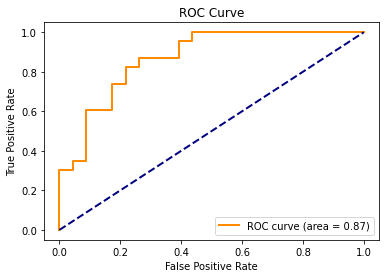

In [21]:
plot_roc(fpr_pew, tpr_pew, auc_pew, lw=2)

In [22]:
X=df.drop(columns=['output', 'age', 'chol', 'fbs', 'restecg', 'slp'])
y=df['output']
X.head()

,sex,cp,trtbps,thalachh,exng,oldpeak,caa,thall
0,1,3,145,150,0,2.3,0,1
1,1,2,130,187,0,3.5,0,2
2,0,1,130,172,0,1.4,0,2
3,1,1,120,178,0,0.8,0,2
4,0,0,120,163,1,0.6,0,2


In [23]:
#Creating LR model with no penalty, 5-fold cross validation
modclass0 = LogisticRegression(penalty='none', solver='newton-cg')
scores0 = cross_val_score(modclass0, X, y, cv=5)
scores0

array([0.78688525, 0.86885246, 0.81967213, 0.9       , 0.71666667])

In [24]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores0.mean(), 2*scores0.std()/np.sqrt(5)))

Accuracy: 0.82 (+/- 0.06)


In [25]:
#Creating LR model with LASSO penalty, 5-fold cross validation
modclass1 = LogisticRegression(penalty='l1',
                               solver='liblinear',
                               C=1/.2,
                               max_iter=2000)
scores1 = cross_val_score(modclass1, X, y, cv=5)
scores1

array([0.78688525, 0.86885246, 0.81967213, 0.9       , 0.71666667])

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % \
      (scores1.mean(), 2*scores1.std()/np.sqrt(5)))

Accuracy: 0.82 (+/- 0.06)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1000)

In [30]:
logitReg = LogisticRegression(penalty='l1', 
                              solver='liblinear', 
                              C=5, 
                              max_iter=2000)
logitReg.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=2000, penalty='l1', solver='liblinear')

In [31]:
phat01 = logitReg.predict_proba(X_test)


In [32]:
phat1=phat01[:,1]


In [33]:
fpr, tpr, score = metrics.roc_curve(y_true=y_test, y_score=phat1)
auc = metrics.roc_auc_score(y_true=y_test, y_score=phat1)

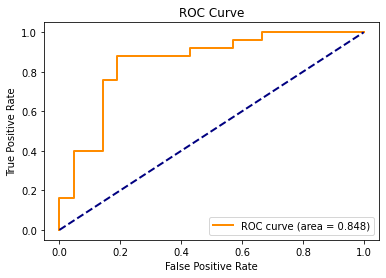

In [34]:
plot_roc(fpr, tpr, auc)

In [35]:
logitReg1 = LogisticRegression(penalty='none', solver='newton-cg')

In [36]:
logitReg1.fit(X_train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [37]:
phat01b=logitReg1.predict_proba(X_test)

In [38]:
phat1b=phat01b[:,1]

In [39]:
fpr, tpr, score = metrics.roc_curve(y_true=y_test, y_score=phat1b)
auc = metrics.roc_auc_score(y_true=y_test, y_score=phat1b)

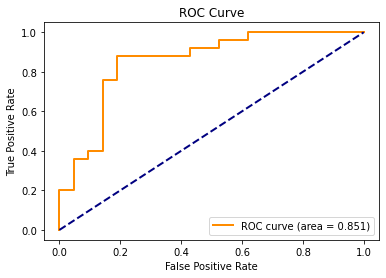

In [40]:
plot_roc(fpr, tpr, auc)

In [41]:
dfcoef = pd.DataFrame(
    np.concatenate((logitReg1.coef_.T, 
                    logitReg.coef_.T,), 
                   axis=1))
dfcoef.rename({"0":"No Penalty"})
dfcoef

,0,1
0,-1.825459,-1.744836
1,0.857990,0.838227
2,-0.020112,-0.017149
3,0.024999,0.027670
4,-1.270873,-1.186264
5,-0.870627,-0.835398
6,-0.677968,-0.658374
7,-1.089713,-1.027065


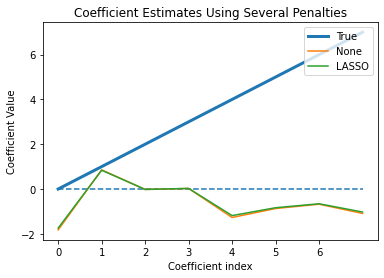

In [42]:
plt.plot(dfcoef.index, lw=3)
for i in range(2):
    plt.plot(dfcoef.index, dfcoef[i])
plt.xticks(np.arange(0,7,1))
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Estimates Using Several Penalties')
plt.legend(['True','None','LASSO'], loc='upper right')
plt.hlines(y=0, xmin=0, xmax=7, linestyles='--')
plt.show()

In [43]:
preprocessor = make_pipeline(RobustScaler())

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression())

In [44]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [45]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=5, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

---------------------------------
RandomForest
Accuracy =  0.782608695652174
-
[[17  4]
 [ 6 19]]
-
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.83      0.76      0.79        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46

-
---------------------------------
AdaBoost
Accuracy =  0.8260869565217391
-
[[17  4]
 [ 4 21]]
-
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.84      0.84      0.84        25

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46

-
---------------------------------
SVM
Accuracy =  0.8478260869565217
-
[[17  4]
 [ 3 22]]
-
              precision    recall  f1-score   support

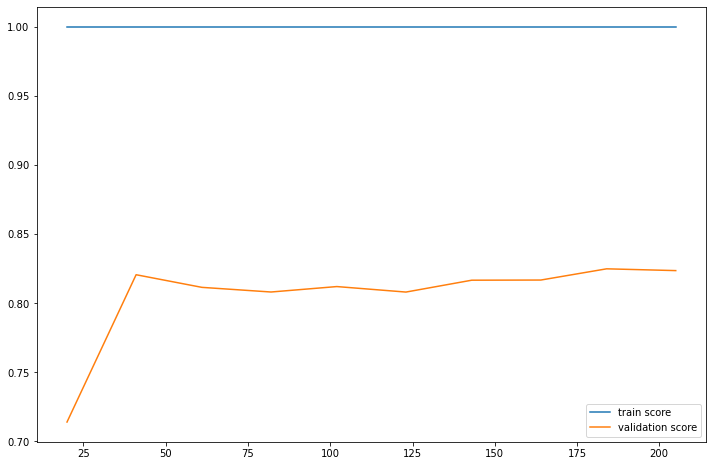

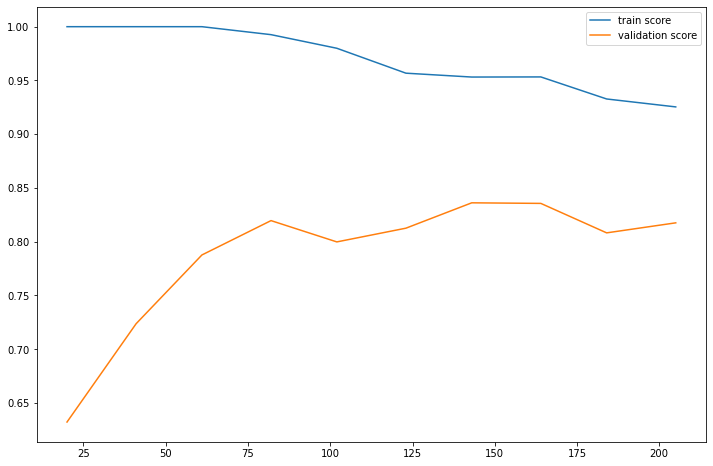

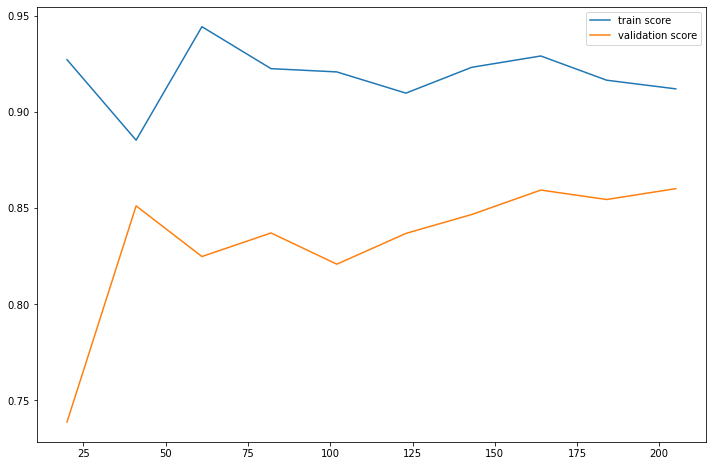

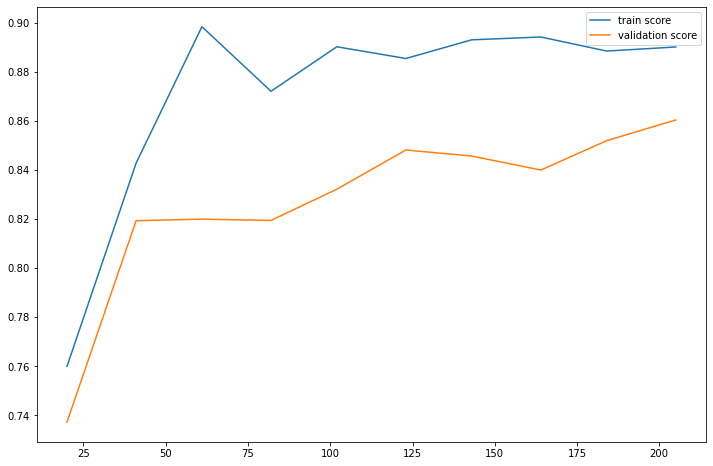

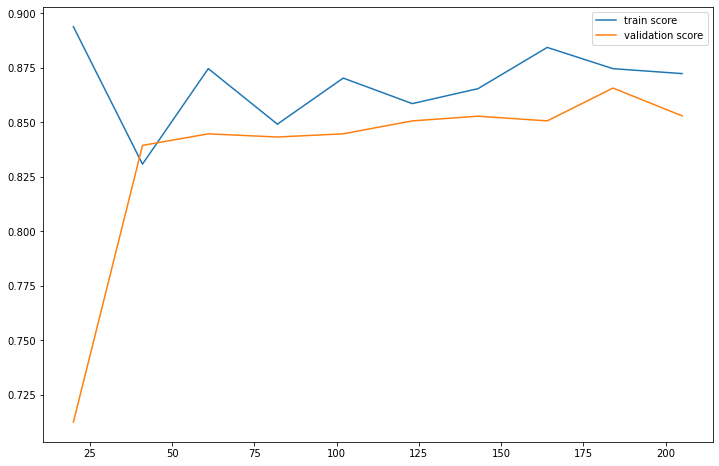

In [46]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

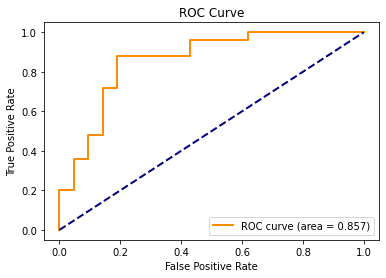

In [47]:
y_pred_prob = LRPipeline.predict_proba(X_test)[:,1]
fpr, tpr, score = metrics.roc_curve(y_true=y_test, y_score=y_pred_prob)
auc = metrics.roc_auc_score(y_true=y_test, y_score=y_pred_prob)
plot_roc(fpr, tpr, auc)